# 통계적 머신러닝 final project 

## 분류 기법의 GridSearch를 통한 최적의 모수 설정과 성능 비교

### 통계학과 2016150424 이채빈

## 목표
UCI의 Machine Learning Repository에서 Vertebral Column Data Set (https://archive.ics.uci.edu/ml/datasets/Vertebral+Column) 을 이용하여 수업시간에 배운 다양한 머신러닝 분류 기법들을 적용해볼 것이다. Gridsearch를 통해 최적의 hyper parameter를 설정하여 각 분류 기법 별로 분류 과정과 특징, 장단점을 살펴보고 각 기법의 성능을 파악해 그 중 어떤 것이 best인지 알아보는 것이 목표이다.

## Descriptive Statistics (Preprocessing)

In [1]:
import pandas as pd
vertebral=pd.read_csv("column_3C.txt", header=None, sep=" ")
vertebral.columns=["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", 
                   "sacral slope", "pelvic radius", "grade of spondylolisthesis", "diagnosis"]
vertebral.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,diagnosis
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH


Vertebral Column Data를 vertebral의 변수명으로 불러온 후, 처음 5개 관측치를 출력했다. 첫 6개 열은 골반 및 요추 환자의 생체 역학 특성들(골반 입사, 골반 기울기, 요추 전만 각도, 척추 경사, 골반 요골, 척추미끄럼증 정도)이고, 마지막 7번째 열은 환자의 상태에 따른 진단 결과이다. 

In [2]:
print(vertebral.shape)
vertebral.info()

(310, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic incidence              310 non-null float64
pelvic tilt                   310 non-null float64
lumbar lordosis angle         310 non-null float64
sacral slope                  310 non-null float64
pelvic radius                 310 non-null float64
grade of spondylolisthesis    310 non-null float64
diagnosis                     310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


vertebral data의 행과 열의 수는 310 * 7 이다. 데이터의 결측치 유무와 변수 형태를 파악하기 위해 info함수를 이용한 결과, 모든 열에 걸쳐 결측치는 없고 data type은 float임을 확인하였다.

In [3]:
X=vertebral.drop('diagnosis', axis=1)
print(X.shape)
y=vertebral['diagnosis']
print(y.shape)
y.value_counts()

(310, 6)
(310,)


SL    150
NO    100
DH     60
Name: diagnosis, dtype: int64

마지막 열 'diagnosis'을 제외한 나머지 열들로 특성변수들, X를 설정하고, 마지막 열 'diagnosis'를 목적변수, y로 설정한다. Feature matrix의 size는 310 * 6 이고, target array는 310 * 1 vector이다. y label 값은 SL (Spondylolisthesis: 척추미끄럼증), NO (Normal: 정상), DH(Disk Hernia: 디스크 탈장) 총 3개이며, 각각의 실제 label 수를 확인하였다.

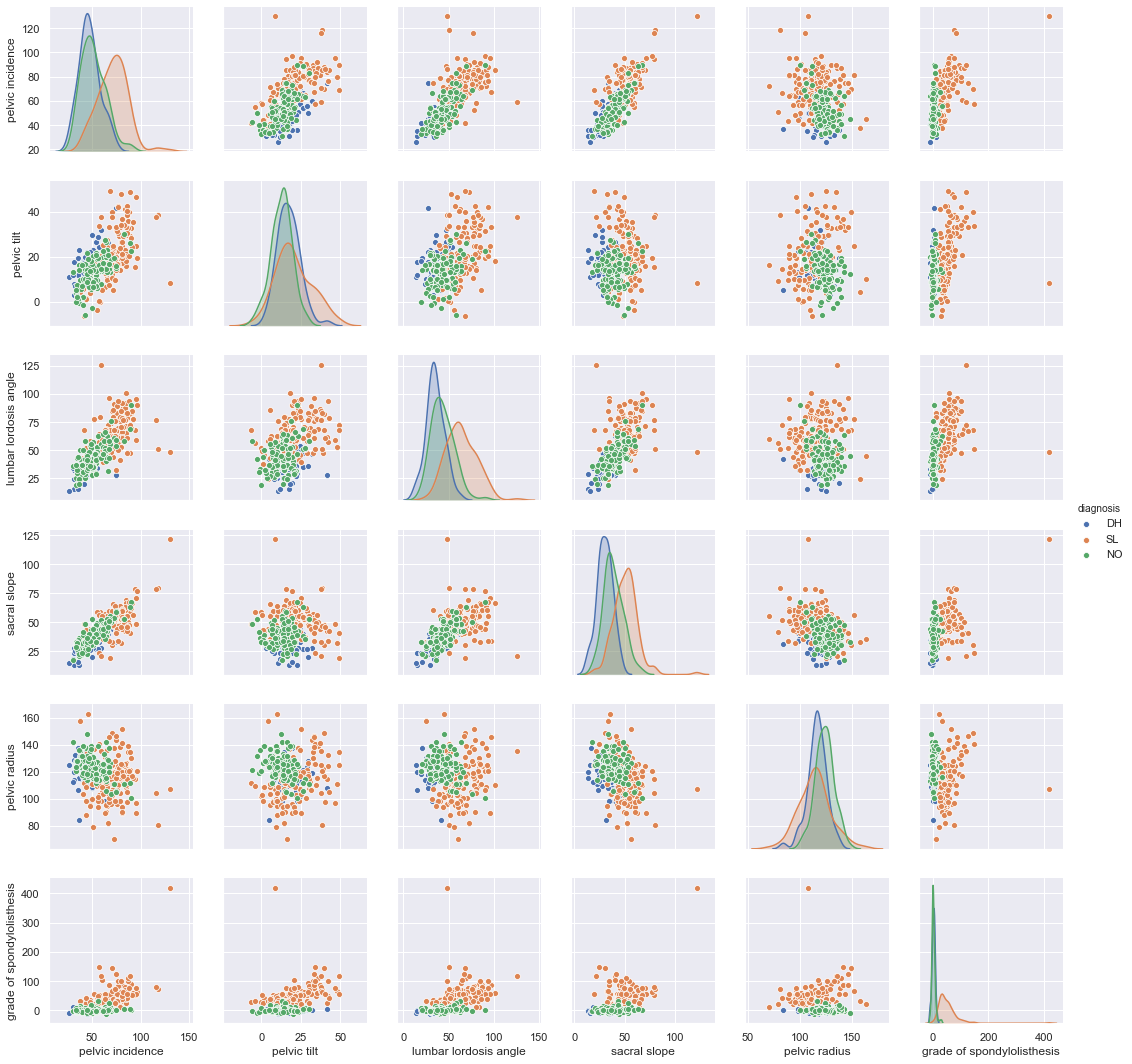

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(vertebral, hue='diagnosis')

분류 기법을 적용하기에 앞서, 각 feature에 대하여 diagnosis별로 어떤 분포가 나오는지 plot을 이용해 확인하였다. 

In [5]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
classle=LabelEncoder() 
y=classle.fit_transform(vertebral['diagnosis'].values)
print('species labels:', np.unique(y))

species labels: [0 1 2]


목적변수가 범주형 변수이므로 dummy를 만들기 위해 LabelEncoder method를 불러와 변환을 해주었다.

데이터에 실제 분류 기법들을 적용시키기에 앞서 특성변수와 목적변수의 자료 형태, 결측치 여부, 관계 파악, 변수의 적절한 전처리를 진행하였다. 이제 본격적으로 총 5가지의 분류 기법들을 적용시켜 볼 것이다. 데이터를 test set과 train set으로 분리하고, 각각의 분류 기법들에GridSearch를 이용하여 best parameter를 찾아 fit시키고 test set에 predict하여 특징과 성능을 비교해 볼 것이다.

## 1. K-neighbors Classifier(KNN)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Xtrain,Xtest,ytrain,ytest=train_test_split(X, y, random_state=0, train_size=0.7, stratify=y)
param_grid={'n_neighbors': np.arange(1,50), 'p':[1,2]}
grid=GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, iid=False)
grid.fit(Xtrain, ytrain)
scores=pd.DataFrame(grid.cv_results_)
sc=scores[['params', 'mean_test_score', 'rank_test_score']]
sc.sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
12,"{'n_neighbors': 7, 'p': 1}",0.843554,1
47,"{'n_neighbors': 24, 'p': 2}",0.838970,2
13,"{'n_neighbors': 7, 'p': 2}",0.838613,3
5,"{'n_neighbors': 3, 'p': 2}",0.835093,4
23,"{'n_neighbors': 12, 'p': 2}",0.834444,5


X와 y를 각각 70%, 30%의 비율로 train set과 test set으로 나누었고, 이때 y의 비율에 맞게 층화추출하기 위해 stratify=y를 이용했다. KNeighborsClassifier의 중요 hyper parameter인 n_neighbors(인접한 이웃의 수)와 p(거리측정기준)의 값을 변화시켜 최적화를 진행하였다. 그 후, train data에 fitting을 하였고, hyper parameter 경우의 수와 10번의 교차검증의 평균 score, 그리고 순위를 나타내어 평균 score이 제일 높은 순서부터 정렬을 해 parameter의 변화에 따른 평균 score을 볼 수 있었다. 그 결과, 인접한 이웃의 수가 7일때, 그리고 거리측정기준으로 manhattan distance를 이용하였을 때 성능이 약 84.36%로 제일 높게 나왔음을 확인하였다. K-neighbors Classifier는 parameter 설정도 간단한 편이고, 모델이 이해하기 쉽다는 아주 큰 장점을 가지고 있다. 

In [7]:
estimator=grid.best_estimator_
Xtest_pred=estimator.predict(Xtest)
print("Accuracy of test set: ", round(accuracy_score(ytest, Xtest_pred),4))
knn_accuracy=round(accuracy_score(ytest, Xtest_pred),4)
print(confusion_matrix(y_true=ytest,y_pred=Xtest_pred))

Accuracy of test set:  0.8387
[[11  7  0]
 [ 4 25  1]
 [ 1  2 42]]


이 best parameter를 이용하여 test set에 대해 예측을 하고 정확도를 파악한 결과, 약 83.87%의 정확도를 도출하였다. 이때 confusion matrix를 통해 분류의 결과를 볼 수 있는데, 총 78개(11+25+42)가 정확하게 분류되었고, 15개(7+4+1+1+2)가 오분류되었다.

## 2. Discriminant Analysis

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(Xtrain, ytrain)
ytrain_pred=qda.predict(Xtrain)
ytest_pred=qda.predict(Xtest)
print("Accuracy of train set: ", round(accuracy_score(ytrain, ytrain_pred),4))
print("Accuracy of test set: ", round(accuracy_score(ytest, ytest_pred),4))
qda_accuracy=round(accuracy_score(ytest, ytest_pred),4)
print(confusion_matrix(y_true=ytest, y_pred=ytest_pred))
print()
print(qda.predict_proba(Xtest[:5]).round(2))

Accuracy of train set:  0.8618
Accuracy of test set:  0.8817
[[13  4  1]
 [ 3 24  3]
 [ 0  0 45]]

[[0.2  0.79 0.01]
 [0.   0.13 0.86]
 [0.02 0.   0.98]
 [0.   0.   1.  ]
 [0.   0.   1.  ]]


두 번째로 Quadratic Discriminant Analysis를 이용하여 분류를 진행해 보았다. 그 결과, train data의 정확도는 86.18%, test data의 정확도는 88.17%를 보였다. Confusion matrix를 통해 DH(Disk Hernia: 디스크 탈장)는 모두 잘 분류되었으나, SL와 NO에서 11개(4+1+3+3) 의 오분류가 있음을 볼 수 있다. 또한, Predict_proba를 통해 classification probability를 파악한 결과, 첫 번째 환자는 class1(NO)으로, 두 번째부터 다섯 번째 환자는 class2(DH)로 분류되는 과정을 볼 수 있다. Quadratic Discriminant Analysis는 앞서한 K-neighbors classifier보다 정확도가 조금 더 높음을 확인할 수 있었고, 각 sample이 어떤 class로 분류되는지 그 과정을 쉽게 이해할 수 있었다.

## 3. Support Vector Machine (SVM)

In [9]:
from sklearn.svm import SVC 
param_grid={'C':[1e2,1e3,1e4], 'kernel':['linear','rbf'],
            'gamma':[0.001,0.01,0.1]}
grid=GridSearchCV(SVC(random_state=0), param_grid, cv=10, iid=False)
grid.fit(Xtrain, ytrain)
scores=pd.DataFrame(grid.cv_results_)
sc=scores[['params', 'mean_test_score', 'rank_test_score']]
sc.sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
8,"{'C': 1000.0, 'gamma': 0.01, 'kernel': 'linear'}",0.861971,1
10,"{'C': 1000.0, 'gamma': 0.1, 'kernel': 'linear'}",0.861971,1
6,"{'C': 1000.0, 'gamma': 0.001, 'kernel': 'linear'}",0.861971,1
4,"{'C': 100.0, 'gamma': 0.1, 'kernel': 'linear'}",0.852644,4
0,"{'C': 100.0, 'gamma': 0.001, 'kernel': 'linear'}",0.852644,4


세 번째는 Support Vector Machine을 이용하였고, 여기서는 분류가 목적이므로 SVC를 호출하였다. SVC의 중요 hyper parameter인 C(완화변수 허용정도), kernel(커널의 종류), gamma(가우시안 커널 폭의 역수로 하나의 sample이 미치는 영향의 범위를 결정하는 변수)의 값을 변화시켜 최적화를 진행하였다. 그 후 train data에 fitting을 하고 hyper parameter 경우의 수와 10번의 교차검증의 평균 score, 그리고 순위를 나타내어 평균 score가 제일 높은 순위부터 정렬을 하였다. 그 결과, C가 1000, gamma가 0.001, 0.01, 0.1, 그리고 linear kernel일 때 총 3가지의 경우가 성능이 약 86.2%로 높게 나왔다.

In [10]:
print("GridSearchCV best parameter", grid.best_params_)
print("GridSearchCV best accuracy", round(grid.best_score_,4))
estimator=grid.best_estimator_
Xtest_pred=estimator.predict(Xtest)
print("Accuracy of test set: ", round(accuracy_score(ytest, Xtest_pred),4))
svm_accuracy=round(accuracy_score(ytest, Xtest_pred),4)
from sklearn.metrics import classification_report
print(classification_report(y_true=ytest,y_pred=Xtest_pred))

GridSearchCV best parameter {'C': 1000.0, 'gamma': 0.001, 'kernel': 'linear'}
GridSearchCV best accuracy 0.862
Accuracy of test set:  0.871
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.83      0.83      0.83        30
           2       0.95      0.93      0.94        45

    accuracy                           0.87        93
   macro avg       0.84      0.85      0.84        93
weighted avg       0.87      0.87      0.87        93



Gamma가 클수록 복잡한 모델을 만들기 때문에, 같은 성능이 나온다면 Gamma가 작은 것을 택하여, 최적의 hyper parameter는 C가 1000, gamma가 0.001, linear kernel으로 볼 수 있다. 이 hyper parameter를 test set에 대해 적용하여 예측을 하고 정확도를 파악한 결과, 약 84%의 결과를 도출하였다. 또한, Classification_report에서 각 class에 대한 정밀도, 재현율, f1-점수, 지지도를 확인할 수 있는데, f1-점수는 정밀도와 재현율의 조화평균으로 불균형한 분류 데이터셋에서는 더 나은 지표가 될 수 있다. 가중치 평균 f1-score를 확인하면 84%의 accuracy를 확인할 수 있다. 각 class 별로 보면, class2(DH)의 정밀도, 재현율이 class0(SL), class1(NO)보다 높게 나타남을 볼 수 있다. 마지막으로 지지도를 통해 각 class에 해당하는 진짜 sample의 수도 확인해 볼 수 있다. SVM은 앞서한 Quadratic Discriminant Analysis보다는 성능이 조금 떨어지고, parameter 설정이 보다 복잡하고, 모델이 이해하기 어렵다는 단점이 있다. 그러나 parameter의 조합으로 다양한 결정 경계를 만들어 성능을 높일 수 있다는 장점이 있는 분류 기법이다.

## 4. Decision Tree Classifier 

In [11]:
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':[2,3,4,5]}
grid=GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, iid=False)
grid.fit(Xtrain, ytrain)
scores=pd.DataFrame(grid.cv_results_)
sc=scores[['params', 'mean_test_score', 'rank_test_score']]
sc.sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
0,{'max_depth': 2},0.834463,1
2,{'max_depth': 4},0.806503,2
3,{'max_depth': 5},0.783324,3
1,{'max_depth': 3},0.779409,4


네 번째로 Decision Tree Classifier를 이용하였다. Decision Tree Classifier의 중요 hyper parameter에는 과대적합을 방지하기 위한 max_depth, max_leaf_nodes, min_samples_leaf 등의 parameter들이 있으나 그 중 하나만 지정해도 overfitting을 막는데 충분하다고 생각되어 max_depth(트리의 최대 깊이) 값만을 변화시켜 최적화를 진행하였다. 그 후 train data에 fitting을 하고 parameter 경우의 수와 10번의 교차검증의 평균 score, 그리고 순위를 나타내어 평균 score가 제일 높은 순위부터 정렬을 하였다.

GridSearchCV best parameter {'max_depth': 2}
GridSearchCV best accuracy 0.8345
Accuracy of test set:  0.7849


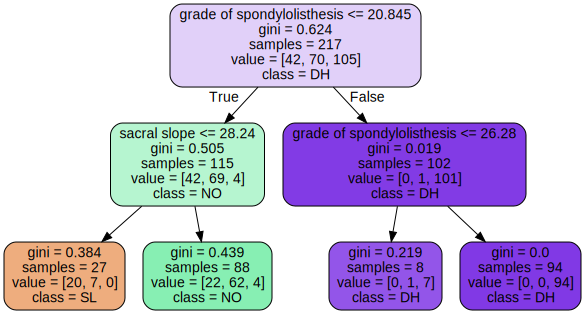

In [12]:
from sklearn import tree
print("GridSearchCV best parameter", grid.best_params_)
print("GridSearchCV best accuracy", round(grid.best_score_,4))
estimator=grid.best_estimator_
Xtest_pred=estimator.predict(Xtest)
print("Accuracy of test set: ", round(accuracy_score(ytest, Xtest_pred),4))
decision_tree_accuracy=round(accuracy_score(ytest, Xtest_pred),4)
from sklearn.tree import export_graphviz
export_graphviz(estimator, filled=True, rounded=True,
                           class_names=['SL','NO','DH'], 
                           feature_names=["pelvic incidence", "pelvic tilt", 
                                          "lumbar lordosis angle", "sacral slope", 
                                          "pelvic radius", "grade of spondylolisthesis"],
                           out_file="tree.dot")
import graphviz
with open("tree.dot") as f: 
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

그 결과, 트리의 최대 깊이가 2일 때 정확도가 83.45%로 제일 높게 나왔고, 이 parameter를 이용하여 test set에 대해 예측을 하고 정확도를 파악한 결과 약 78.49%로 정확도가 많이 떨어진 결과를 도출할 수 있었다. 이처럼 GridSearch를 통해 알아낸 최적의 parameter임에도 불구하고 Decision Tree Classifier에서는 과대적합을 막기 부족하여 일반화에는 어려움이 있다. 그러나, Decision Tree Classifier는 트리를 시각화하여 각 노드의 규칙에 따라 알고리즘의 예측이 어떻게 이루어지는지를 한 눈에 파악할 수 있다는 큰 장점이 있다.

## 5. Ensemble : Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators':[100,200], 'max_depth':[3,4,5,6], 
            'max_features':['sqrt', 'log2', None]}
grid=GridSearchCV(RandomForestClassifier(random_state=0, n_jobs=-1), param_grid, cv=10, iid=False)
grid.fit(Xtrain, ytrain)
print("GridSearchCV best parameter", grid.best_params_)
print("GridSearchCV best accuracy", round(grid.best_score_,4))

GridSearchCV best parameter {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
GridSearchCV best accuracy 0.839


마지막으로 여러 머신러닝 모델을 결합하여 강력한 모델을 만드는 앙상블 모델 중 Random Forest Classifier를 적용시켰다. Random Forest Classifier의 중요 hyper parameter인 n_estimators(결정 트리의 개수), max_depth(트리의 최대 깊이: decision tree에서 overfitting을 막기 위해 사용한 parameter로, 결정 트리를 기본 요소로 사용하는 random forest classifier에서도 사용 가능함), max_features(각 트리가 얼마나 무작위가 될지를 결정)의 값을 변화시켜 최적화를 진행하였다. 그 후 train data에 fitting을 하여 best parameter를 찾아낸 결과, n_estimators가 200, max_depth가 5, max_features가 sqrt(최적의 split을 위해 sqrt(n_features)의 수만큼 고려함)일때 성능이 약 83.9%로 나왔다.

In [14]:
estimator=grid.best_estimator_
Xtest_pred=estimator.predict(Xtest)
print("Accuracy of test set: ", round(accuracy_score(ytest, Xtest_pred),4))
random_forest_accuracy=round(accuracy_score(ytest, Xtest_pred),4)

Accuracy of test set:  0.8817


이 best parameter를 이용하여 test set에 대해 예측을 하고 정확도를 파악한 결과, 약 88.17%의 꽤 높은 정확도를 도출하였다. Random Forest Classifier는 성능이 매우 뛰어나고 parameter가 보다 간단하게 설정될 수 있다는 장점이 있다. 또한, 여러 결정 트리의 묶음으로, test data에 overfitting 경향이 큰 Decision Tree의 단점을 보완하여 overfitting을 막을 수 있음을 볼 수 있다.

## 결론

5가지 분류 기법들의 test data에 대한 accuracy를 한 눈에 보이도록 출력해 보았다.

In [15]:
print("knn test accuracy", knn_accuracy )
print("qda test accuracy", qda_accuracy )
print("svm test accuracy", svm_accuracy )
print("decision_tree test accuracy", decision_tree_accuracy )
print("random_forest test accuracy", random_forest_accuracy )

knn test accuracy 0.8387
qda test accuracy 0.8817
svm test accuracy 0.871
decision_tree test accuracy 0.7849
random_forest test accuracy 0.8817


5개의 분류 기법들의 특징을 살펴보고 비교해 본 결과 test data에 대해 discriminant analysis와 random forest classifier의 성능이 제일 좋음을 확인하였다. 

+ K-neighbors Classifier는 간단한 parameter 설정과 이해하기 매우 쉬운 모델이라는 큰 장점이 있다. 
+ Discriminant Analysis는 각 sample마다 분류가 어떻게 결정되었는지 과정을 쉽게 이해할 수 있는 기법이며, 성능에 있어서도 높은 정확도를 보였다.
+ Support Vector Machine은 분류가 어떻게 결정되었는지 이해하기 복잡하고 설명이 난해하며 parameter 설정에 신경을 많이 써야 한다는 단점이 있으나, 데이터의 특성이 많지 않아도 복잡하고 다양한 결정 경계를 만들어 성능을 높일 수 있다는 장점이 있다. 
+ Decision Tree Classifier는 쉽게 시각화를 할 수 있어서 분류 과정을 이해하기 쉽다는 큰 장점이 있으나, parameter로 조정을 함에도 불구하고 test set에 대해 성능이 그다지 좋지 않고 과대적합되는 경향이 있어 일반화를 하기 어렵다는 단점이 있다.
+ Ensemble 모델 중 Random Forest Classifier는 Decision Tree의 단점을 보완한 여러 tree의 묶음으로, 과대적합을 막아 다른 모델보다 최소 같거나 더 좋은 성능을 낼 수 있다는 장점이 있다. 